Columns and Data Types:

Variance: float64 - Represents the variance of wavelet transformed image.
Skewness: float64 - Represents the skewness of wavelet transformed image.
Curtosis: float64 - Represents the curtosis of wavelet transformed image.
Entropy: float64 - Represents the entropy of the image.
Class: int64 - This is the target variable, where 0 indicates a genuine bill and 1 indicates a counterfeit bill.

In [53]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


#load the bill_authentication dataset
df=pd.read_csv('D://bsbi/assignments/bill_authentication.csv')

#first 5 rows
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [54]:
#counts of rows
df.count()

Variance    1372
Skewness    1372
Curtosis    1372
Entropy     1372
Class       1372
dtype: int64

In [55]:
#last 10 rows
df.tail(10)

,Variance,Skewness,Curtosis,Entropy,Class
1362,-2.16680,1.59330,0.045122,-1.67800,1
1363,-1.16670,-1.42370,2.924100,0.66119,1
1364,-2.83910,-6.63000,10.484900,-0.42113,1
1365,-4.50460,-5.81260,10.886700,-0.52846,1
1366,-2.41000,3.74330,-0.402150,-1.29530,1
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1
1371,-2.54190,-0.65804,2.684200,1.19520,1


In [56]:
#check null values
df.isnull().values.any()

False

In [57]:
#check duplicates
df.duplicated().sum()

24

In [58]:
#I don't want to lose orjinal dataset so copied it and drop duplicates and check count again
bill_df=df.copy()
bill=bill_df.drop_duplicates()
bill.count()


Variance    1348
Skewness    1348
Curtosis    1348
Entropy     1348
Class       1348
dtype: int64

In [59]:
#let's check the first 10 row in the new dataset
bill.head(10)

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [60]:
#Let's check statistics of columns
bill.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1348.0,0.445785,2.862906,-7.0421,-1.78665,0.518735,2.853250,6.8248
Skewness,1348.0,1.909039,5.868600,-13.7731,-1.62700,2.334150,6.796025,12.9516
Curtosis,1348.0,1.413578,4.328365,-5.2861,-1.54560,0.605495,3.199800,17.9274
Entropy,1348.0,-1.168712,2.085877,-8.5482,-2.39310,-0.578890,0.403863,2.4495
Class,1348.0,0.452522,0.497925,0.0000,0.00000,0.000000,1.000000,1.0000


In [61]:
#Is there any relation between the columns?
bill.corr()


,Variance,Skewness,Curtosis,Entropy,Class
Variance,1.000000,0.272863,-0.387171,0.273993,-0.735185
Skewness,0.272863,1.000000,-0.785376,-0.520293,-0.449835
Curtosis,-0.387171,-0.785376,1.000000,0.311379,0.154376
Entropy,0.273993,-0.520293,0.311379,1.000000,-0.033979
Class,-0.735185,-0.449835,0.154376,-0.033979,1.000000


<Axes: >

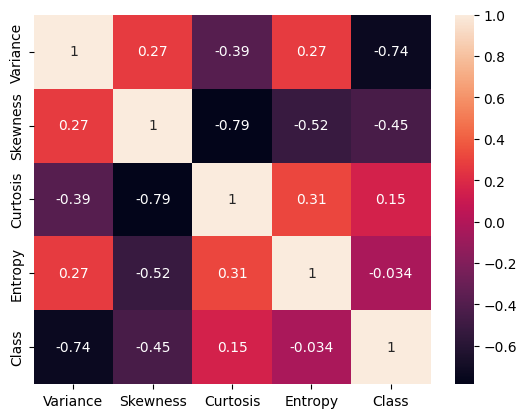

In [62]:
import matplotlib as mpl
import seaborn as sns
sns.heatmap(bill.corr(),annot=True)

"Skewness" and "Curtosis" has the strongest negative correlation(-0.79), meaning as one increases, the other tends to decrease.
"Variance" and "Class" are strongly negatively correlated(-0.74). 

"Entropy" has a very weak negative correlation with "Class" (-0.034), indicating that it might not be very predictive of the class.

"Skewness" is also negatively correlated with "Class" (-0.45).
"Curtosis" shows a weak positive correlation with "Class" (0.15).

"Variance" is somewhat positively correlated with "Entropy" (0.27) and Skewness (0.27).
"Curtosis" is moderately positively correlated with "Entropy" (0.31).


<Figure size 800x600 with 0 Axes>

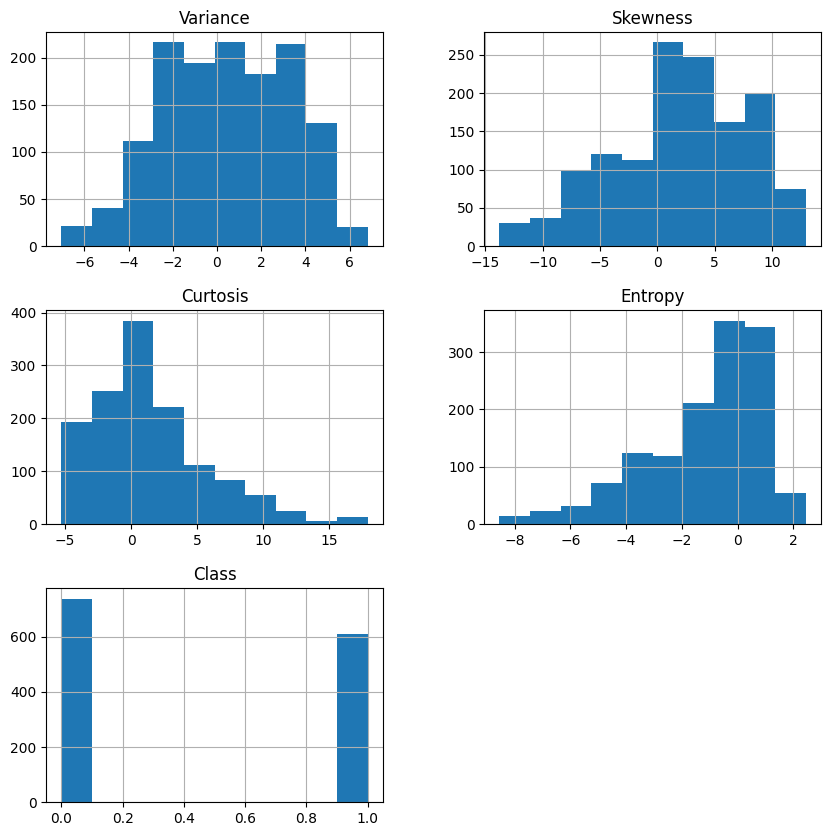

In [64]:
# Example: Plotting a correlation matrix
plt.figure(figsize=(8, 6))
bill.hist(figsize=(10,10))


# Save the plot as a PNG file
plt.savefig('D://bsbi/assignments/hist.png', format='png')

plt.show()


In [65]:
bill.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


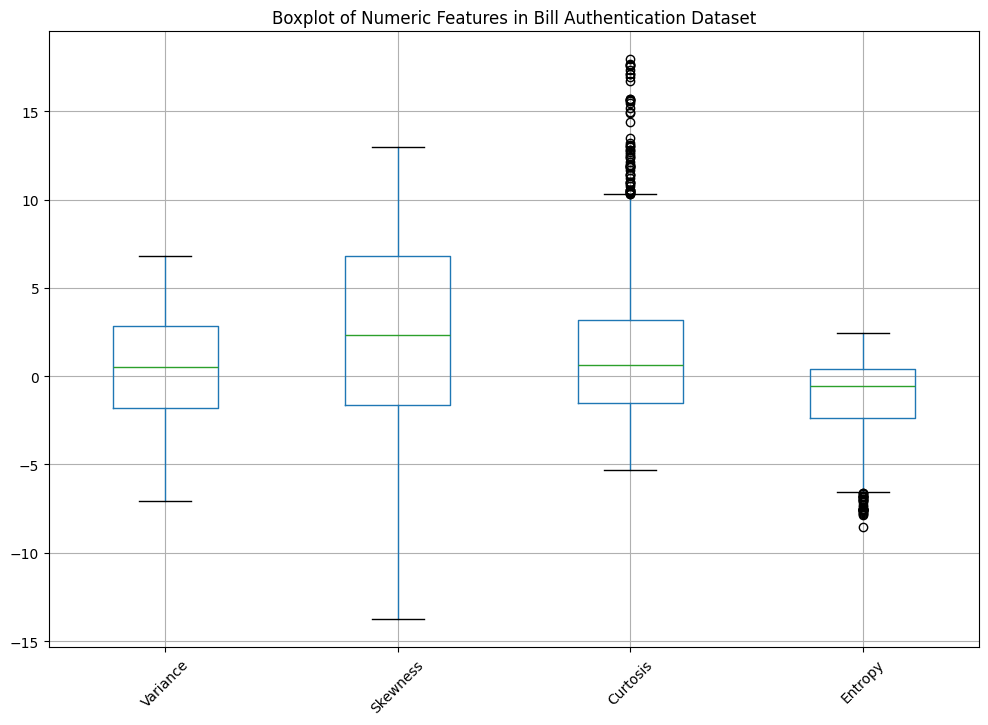

In [66]:
# Generate boxplots for each numeric feature in the dataset
bill_x=bill.iloc[:, :-1]
plt.figure(figsize=(12, 8))
bill_x.boxplot()
plt.title('Boxplot of Numeric Features in Bill Authentication Dataset')
plt.xticks(rotation=45)

# Save the plot as a PNG file
#plt.savefig('D://bsbi/assignments/images/boxplot.png', format='png',dpi=300)

plt.show()


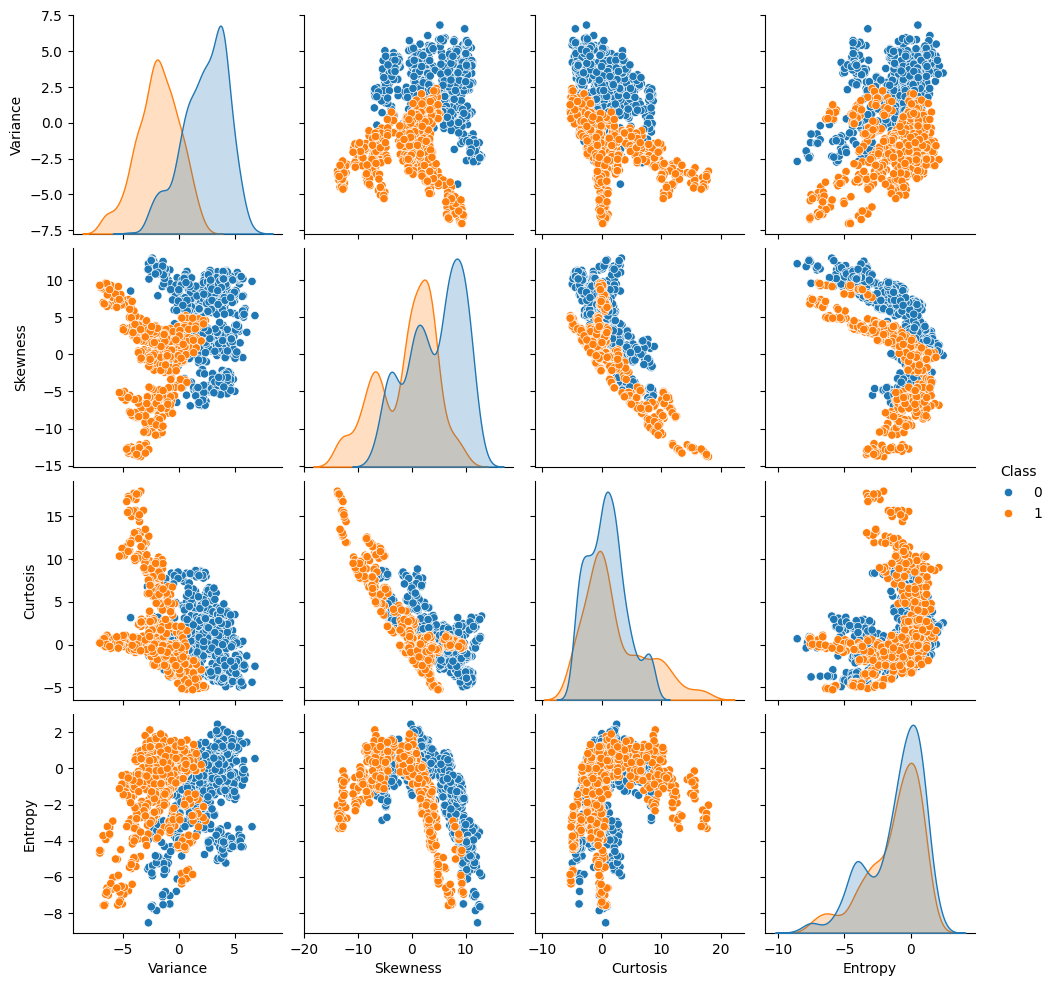

In [67]:
#lets analyze the correlation between the columns via graphs

#bill_x.head()
sns.pairplot(bill, hue='Class')

# Save the plot as a PNG file
#plt.savefig('D://bsbi/assignments/images/pairplot2.png', format='png',dpi=300)

plt.show()

2.Classification problem, using decision trees

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



# Features and target variable. 
X = bill.iloc[:, :-1] #Selects all columns except the last one as features.
y = bill.iloc[:, -1] # Selects the last column as the target variable

# Split the dataset. The random_state=42 ensures reproducibility.30% of the data reserved for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the model
classifier = DecisionTreeClassifier(max_depth=5, random_state=42) # max_depth for better result to avoid overfitting
classifier.fit(X_train, y_train)

# Make predictions.Uses the trained model to predict the target variable for the test data.
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.4f}")

# Make predictions on the training set
y_train_pred = classifier.predict(X_train)

# Calculate training accuracy
accuracy_t = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {accuracy_t:.4f}")

Decision Tree Classifier Accuracy: 0.9753
Training Accuracy: 0.9958


While both training and test accuracies are high, there is a slight gap between them (99.58% on training and 97.53% on testing). This suggests that there might be some level of overfitting, though it isn't too severe..

In [71]:
#trainin acc. %99 it looks like overfitting problem examine this

# Import libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Classification report
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')


Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       221
           1       0.95      0.99      0.97       184

    accuracy                           0.98       405
   macro avg       0.97      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405



While the training accuracy is 100%, the test accuracy is slightly lower at 99%, which is still very high.

The model may be slightly overfitting, as it perfectly classifies the training data but has a very slight drop in accuracy on the test data. However, the drop is minimal, and the test accuracy is still very high, so the overfitting might not be severe in this case.

    Feature  Importance
0  Variance    0.627587
1  Skewness    0.209917
2  Curtosis    0.157028
3   Entropy    0.005468


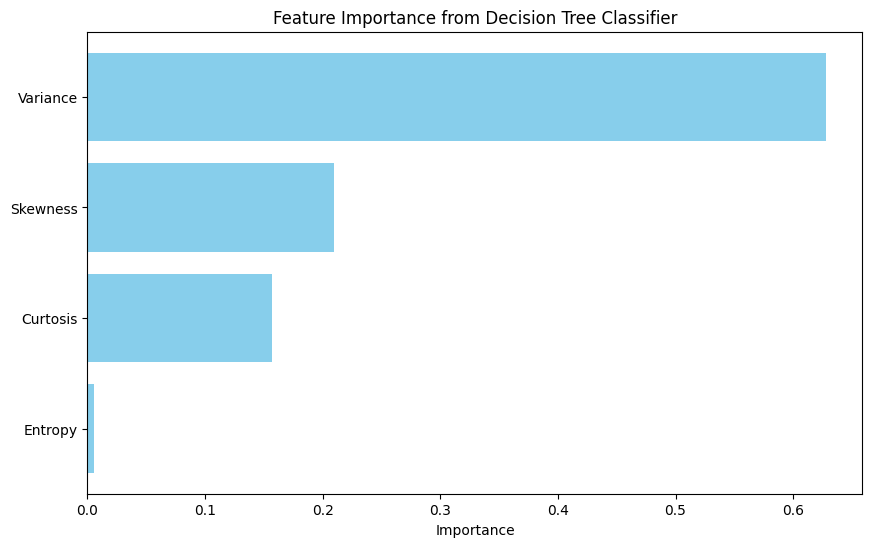

In [73]:
# Get feature importance
importance = classifier.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree Classifier')
plt.gca().invert_yaxis()
plt.show()

The ROC (Receiver Operating Characteristic) curve is a graphical representation of a model's diagnostic ability. It plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. The TPR is also known as sensitivity or recall, while FPR is the proportion of negative cases that were incorrectly classified as positive.

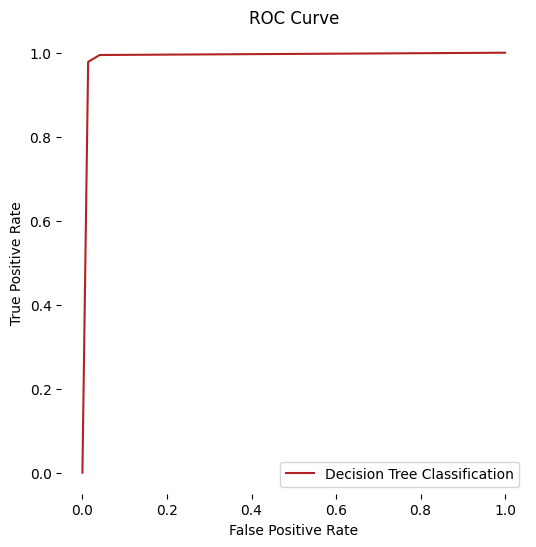

In [75]:
import matplotlib.pyplot as plt

# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

Given the perfect ROC curve and near-perfect accuracy scores, there is a risk of overfitting, which should be further investigated by trying techniques like cross-validation, pruning the decision tree, or using a more complex validation set.

cross-validation

In [78]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation 
cv_scores = cross_val_score(classifier, X, y, cv=5)

#cross-validated accuracy
print(f"Average Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Average Cross-Validation Accuracy: 0.9792


To further assess the model's generalization and reduce the risk of overfitting, I performed 5-fold cross-validation. The model achieved an average cross-validation accuracy of 97.92%, indicating that it performs consistently well across different subsets of the data. Although the accuracy remains high, further techniques like pruning or tuning hyperparameters can still be explored to improve robustness

In [80]:
# Train the decision tree on the full training dataset
final_classifier = DecisionTreeClassifier(max_depth=5,random_state=42)
final_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = final_classifier.predict(X_test)

# Generate the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       221
           1       0.95      0.99      0.97       184

    accuracy                           0.98       405
   macro avg       0.97      0.98      0.98       405
weighted avg       0.98      0.98      0.98       405

Test Set Accuracy: 0.9753086419753086


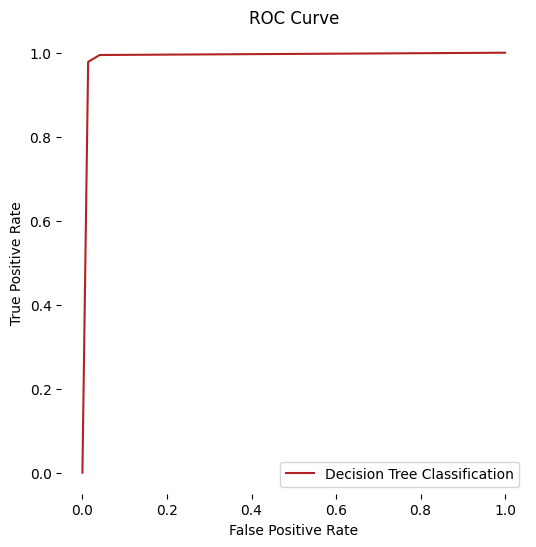

In [81]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='Decision Tree Classification', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

pruning

In [83]:
# Create a pruned decision tree model
pruned_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)

# Fit the model
pruned_classifier.fit(X_train, y_train)

# Evaluate the pruned model
pruned_accuracy = accuracy_score(y_test, pruned_classifier.predict(X_test))
print(f"Pruned Decision Tree Accuracy: {pruned_accuracy:.4f}")


Pruned Decision Tree Accuracy: 0.9679


In [84]:

# Make predictions on the test set using the pruned decision tree
y_pred_pruned = pruned_classifier.predict(X_test)

# Generate the classification report for the pruned decision tree
print("Classification Report (Pruned Decision Tree):")
print(classification_report(y_test, y_pred_pruned))

# Print the accuracy of the pruned decision tree
pruned_accuracy = accuracy_score(y_test, y_pred_pruned)
print("Pruned Decision Tree Accuracy:", pruned_accuracy)

Classification Report (Pruned Decision Tree):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       221
           1       0.94      0.99      0.97       184

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

Pruned Decision Tree Accuracy: 0.9679012345679012


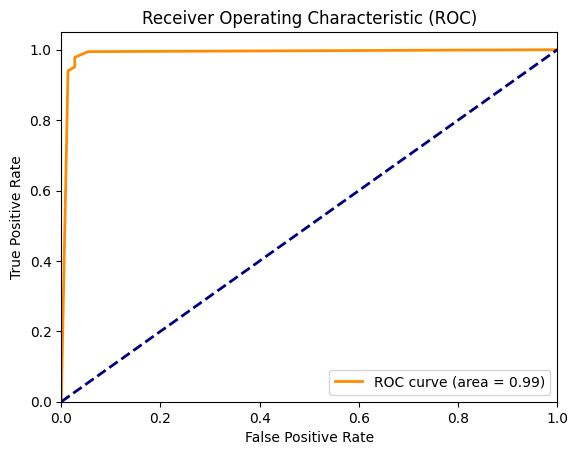

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_prob = pruned_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
# Save the plot as a PNG file
plt.savefig('D://bsbi/assignments/images/roc2.png', format='png',dpi=300)

plt.show()


In [86]:

# Split the dataset with 20% reserved for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pruned decision tree model with max_depth=5 and min_samples_split=20
pruned_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)

# Train the pruned model on the training data
pruned_classifier.fit(X_train, y_train)

# Make predictions on the test set using the pruned decision tree
y_pred_pruned = pruned_classifier.predict(X_test)

# Make predictions on the training set
y_train_pred = pruned_classifier.predict(X_train)

# Generate the classification report for the pruned decision tree on test data
print("Classification Report (Pruned Decision Tree - Test Set):")
print(classification_report(y_test, y_pred_pruned))

# Print the accuracy of the pruned decision tree on test data
pruned_accuracy_test = accuracy_score(y_test, y_pred_pruned)
print("Pruned Decision Tree Test Accuracy(%20):", pruned_accuracy_test)

# Print the accuracy of the pruned decision tree on training data
pruned_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Pruned Decision Tree Training Accuracy (%80):", pruned_accuracy_train)


Classification Report (Pruned Decision Tree - Test Set):
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       147
           1       0.90      1.00      0.95       123

    accuracy                           0.95       270
   macro avg       0.95      0.96      0.95       270
weighted avg       0.96      0.95      0.95       270

Pruned Decision Tree Test Accuracy(%20): 0.9518518518518518
Pruned Decision Tree Training Accuracy (%80): 0.9925788497217068


In [87]:

# Split the dataset with 10% reserved for testing and 90% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Create a pruned decision tree model with max_depth=5 and min_samples_split=20
pruned_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)

# Train the pruned model on the training data
pruned_classifier.fit(X_train, y_train)

# Make predictions on the test set using the pruned decision tree
y_pred_pruned = pruned_classifier.predict(X_test)

# Make predictions on the training set
y_train_pred = pruned_classifier.predict(X_train)

# Generate the classification report for the pruned decision tree on test data
print("Classification Report (Pruned Decision Tree - Test Set):")
print(classification_report(y_test, y_pred_pruned))

# Print the accuracy of the pruned decision tree on test data
pruned_accuracy_test = accuracy_score(y_test, y_pred_pruned)
print("Pruned Decision Tree Test Accuracy (%10):", pruned_accuracy_test)

# Print the accuracy of the pruned decision tree on training data
pruned_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Pruned Decision Tree Training Accuracy(%90):", pruned_accuracy_train)


Classification Report (Pruned Decision Tree - Test Set):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        78
           1       0.90      1.00      0.95        57

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.95       135
weighted avg       0.96      0.96      0.96       135

Pruned Decision Tree Test Accuracy (%10): 0.9555555555555556
Pruned Decision Tree Training Accuracy(%90): 0.9950535861500412


In [88]:

# Split the dataset with 30% reserved for testing and 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pruned decision tree model with max_depth=5 and min_samples_split=20
pruned_classifier = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=20)

# Train the pruned model on the training data
pruned_classifier.fit(X_train, y_train)

# Make predictions on the test set using the pruned decision tree
y_pred_pruned = pruned_classifier.predict(X_test)

# Make predictions on the training set
y_train_pred = pruned_classifier.predict(X_train)

# Generate the classification report for the pruned decision tree on test data
print("Classification Report (Pruned Decision Tree - Test Set):")
print(classification_report(y_test, y_pred_pruned))

# Print the accuracy of the pruned decision tree on test data
pruned_accuracy_test = accuracy_score(y_test, y_pred_pruned)
print("Pruned Decision Tree Test Accuracy:", pruned_accuracy_test)

# Print the accuracy of the pruned decision tree on training data
pruned_accuracy_train = accuracy_score(y_train, y_train_pred)
print("Pruned Decision Tree Training Accuracy:", pruned_accuracy_train)



Classification Report (Pruned Decision Tree - Test Set):
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       221
           1       0.94      0.99      0.97       184

    accuracy                           0.97       405
   macro avg       0.97      0.97      0.97       405
weighted avg       0.97      0.97      0.97       405

Pruned Decision Tree Test Accuracy: 0.9679012345679012
Pruned Decision Tree Training Accuracy: 0.9915164369034994


In [89]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(classifier, X, y, cv=5)  # 5-fold cross-validation
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy: 0.9792


grid search ile veriyi optimize etmek gerekebilir???????

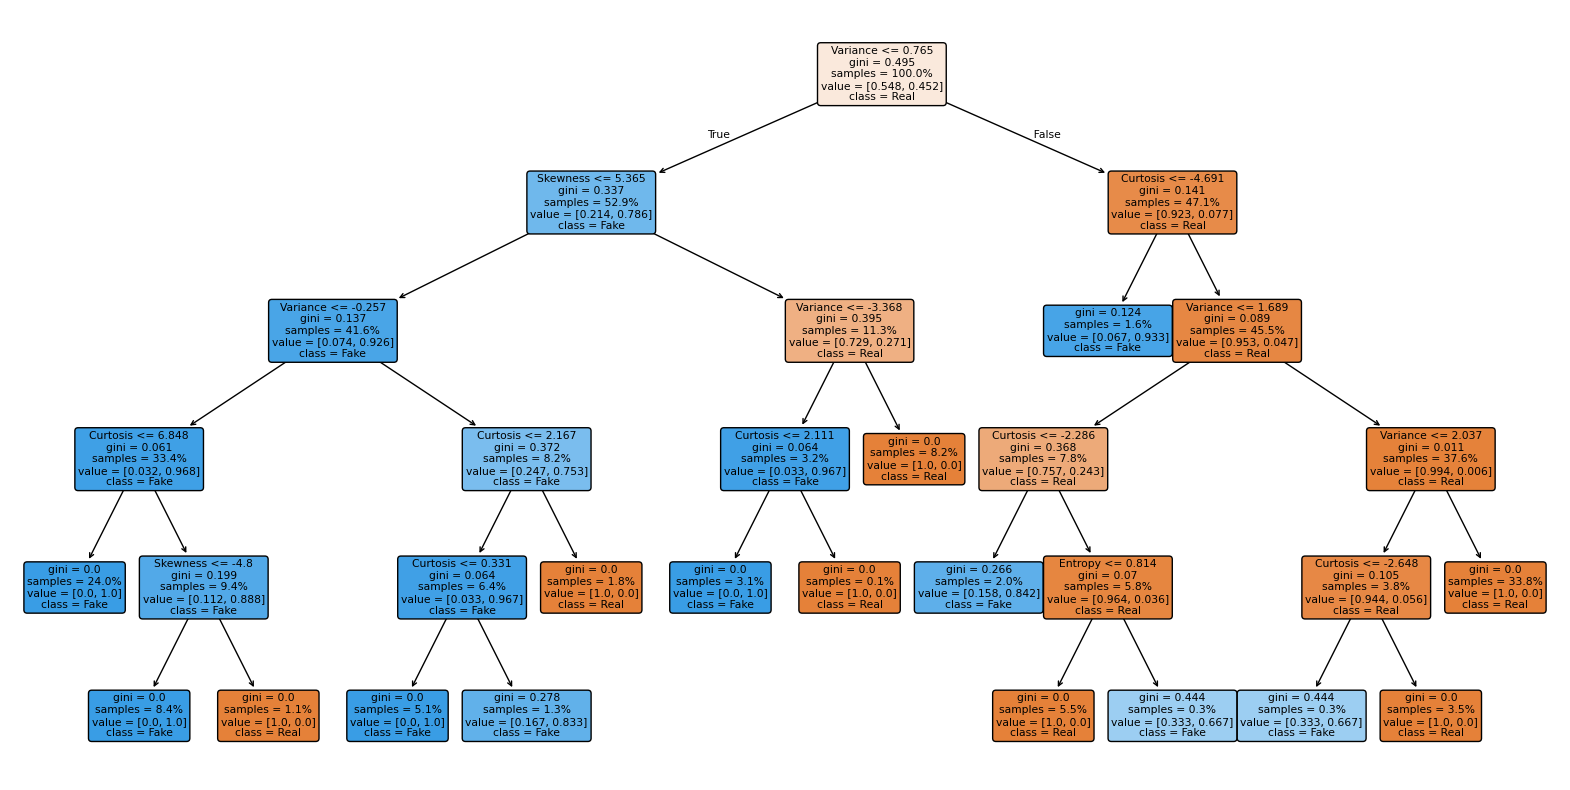

In [91]:

from sklearn import tree
import matplotlib.pyplot as plt

# Visualize the pruned decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(pruned_classifier, 
               feature_names=X.columns,  # Feature names
               class_names=['Real', 'Fake'],  # Target class names
               filled=True,  # Color nodes based on class
               rounded=True,  # Rounded corners for easier visualization
               proportion=True)  # Proportion of classes in nodes

# Save the decision tree visualization
#plt.savefig('D://bsbi/assignments/images/pruned_tree_visualization.png', format='png', dpi=300)

# Show the tree plot
plt.show()

**K means algorithm

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


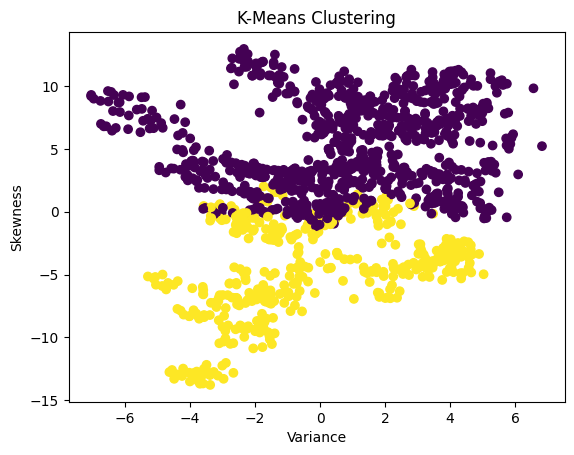

In [93]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Features and target variable. 
X = bill.iloc[:, :-1] #Selects all columns except the last one as features.
y = bill.iloc[:, -1] # Selects the last column as the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the KMeans model
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model
k_fit=kmeans.fit(X)

# Predict the clusters
clusters = kmeans.predict(X)

# Plot the clusters
plt.scatter(X['Variance'], X['Skewness'], c=clusters, cmap='viridis')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('K-Means Clustering')
plt.show()



Variance and Skewness appear to have some distinct patterns and separations, which can be useful for clustering. The scatter plots show potential groupings that K-Means can exploit.

In [95]:
print(kmeans.predict(X_test))

[0 0 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0]


In [96]:
print(kmeans.labels_)
print(y_test)

[0 0 1 ... 1 1 1]
296     0
835     1
833     1
841     1
1098    1
       ..
1065    1
84      0
130     0
868     1
12      0
Name: Class, Length: 405, dtype: int64


In [97]:
k_fit.cluster_centers_

array([[ 0.8825087 ,  5.20072509, -0.92880075, -1.73275173],
       [-0.42282112, -4.63783908,  6.07236581, -0.04688479]])

In [98]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, kmeans.labels_)
print('Silhouette Score:', score)

Silhouette Score: 0.4336539638103771


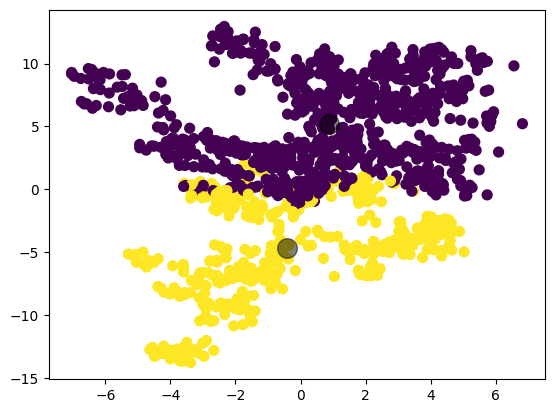

In [99]:
kumeler = k_fit.labels_
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [100]:

# Evaluate clustering performance using a confusion matrix
conf_matrix = confusion_matrix(y, clusters)
print("Confusion Matrix:\n", conf_matrix)

# Accuracy score comparing KMeans clusters and actual labels
accuracy = accuracy_score(y, clusters)
print(f"KMeans Clustering Accuracy compared to actual labels: {accuracy:.4f}")

Confusion Matrix:
 [[555 183]
 [342 268]]
KMeans Clustering Accuracy compared to actual labels: 0.6105


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

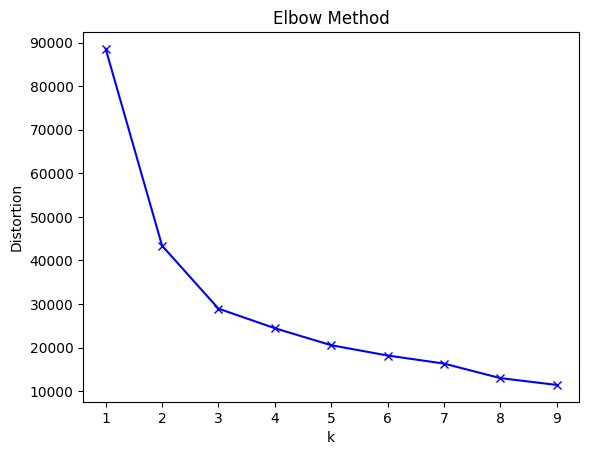

In [101]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure()
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_6700\818515955.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bill['KMeans_Cluster'] = clusters


   Variance  Skewness  Curtosis  Entropy  Class  KMeans_Cluster
0   3.62160    8.6661   -2.8073 -0.44699      0               0
1   4.54590    8.1674   -2.4586 -1.46210      0               0
2   3.86600   -2.6383    1.9242  0.10645      0               1
3   3.45660    9.5228   -4.0112 -3.59440      0               0
4   0.32924   -4.4552    4.5718 -0.98880      0               1


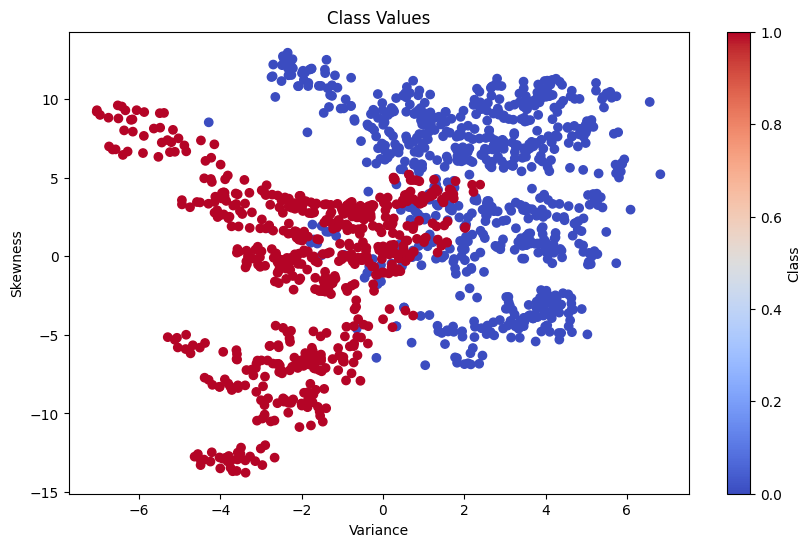

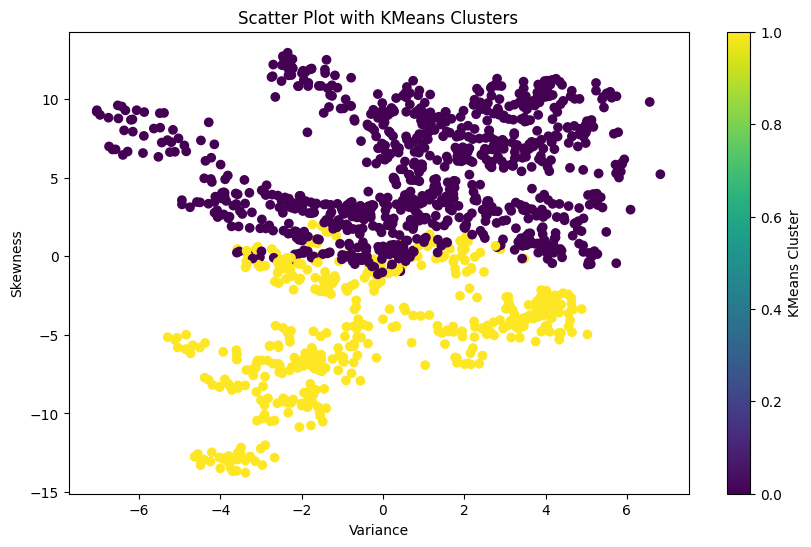

In [102]:
# Add the cluster labels to the original dataframe for comparison
bill['KMeans_Cluster'] = clusters

# Compare the predicted clusters with the actual class labels
# Print first few rows to see the comparison
print(bill[['Variance', 'Skewness', 'Curtosis', 'Entropy', 'Class', 'KMeans_Cluster']].head())

# Plot comparison of actual vs KMeans clusters using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(bill['Variance'], bill['Skewness'], c=bill['Class'], cmap='coolwarm', label='Class')
plt.title('Class Values')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.colorbar(label='Class')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(bill['Variance'], bill['Skewness'], c=bill['KMeans_Cluster'], cmap='viridis', label='KMeans Clusters')
plt.title('Scatter Plot with KMeans Clusters')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.colorbar(label='KMeans Cluster')
plt.show()





C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

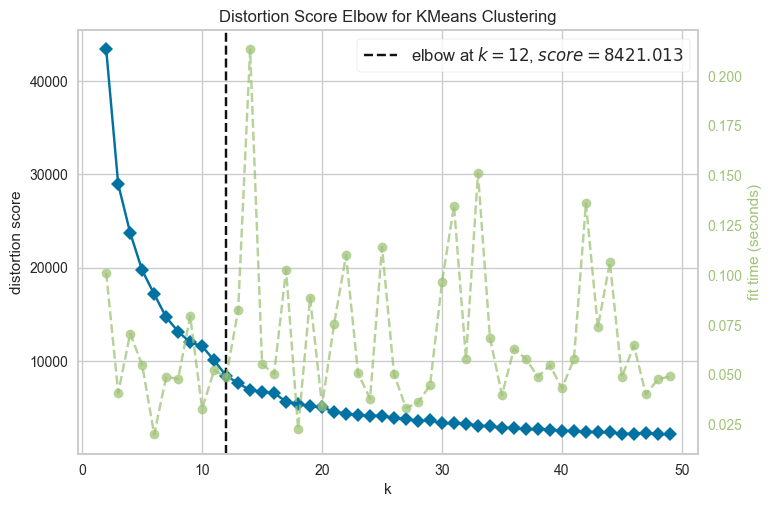

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [103]:
#!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,50))
visualizer.fit(X) 
visualizer.poof()  


Elbow Method Plot
Optimal Number of Clusters: The elbow plot shows the distortion score for different values of 
k
k. The "elbow" at 
k
=
11
k=11 suggests that this is the optimal number of clusters, where adding more clusters results in diminishing returns in reducing distortion.
Model Efficiency: The plot also includes fit time, indicating the computational efficiency of the model as the number of clusters increases.
Conclusion
Feature Choice: Variance and Skewness were chosen due to their ability to reveal distinct patterns and their moderate correlation, making them suitable for clustering analysis.
Optimal Clustering: The elbow method suggests using 11 clusters for a balance between model complexity and performance.
Visualization: These analyses help in understanding the structure of the data and the effectiveness of the K-Means algorithm in identifying meaningfulul clusters.

In [105]:
#!pip install --upgrade matplotlib
import mpl_toolkits

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


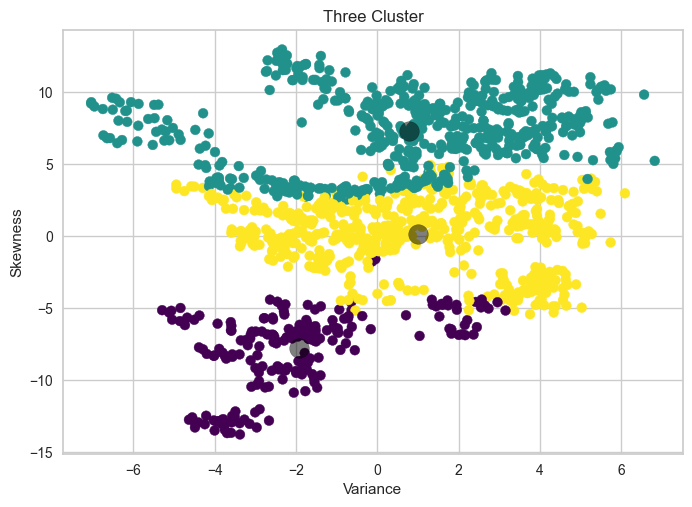

In [106]:
kmeans = KMeans(n_clusters = 3)
k_fit = kmeans.fit(X)
kumeler = k_fit.labels_
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = kumeler, s = 50, cmap = "viridis")
centers = k_fit.cluster_centers_

plt.scatter(centers[:,0], centers[:,1], c = "black", s = 200, alpha = 0.5)


plt.title('Three Cluster')
plt.xlabel('Variance')
plt.ylabel('Skewness')

plt.show()

The Elbow Method suggests that the optimal number of clusters is 11, but the visualization shows a clear separation with fewer clusters. This discrepancy might indicate that while 11 clusters minimize distortion, a smaller number might be more interpretable and sufficient for practical purposes.
A Silhouette Score of 0.4336 suggests the clustering is decent but not perfect, meaning that while the algorithm has done a good job, there could still be room for improvement, perhaps by tuning the number of clusters or exploring different clustering algorithms.

Normalizasyon??????

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


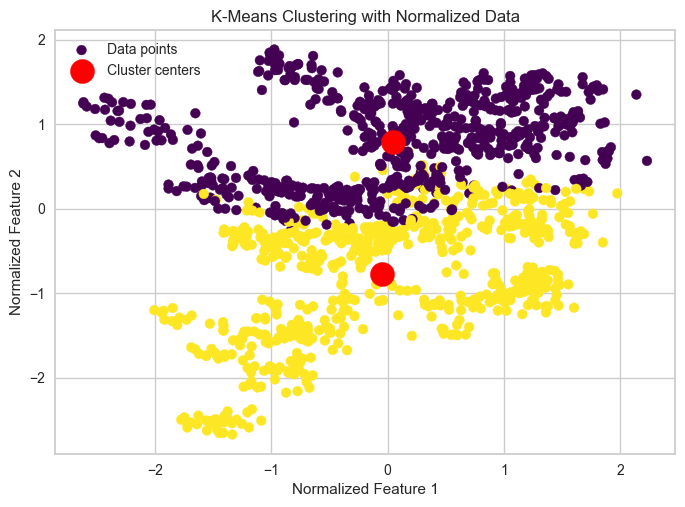

Confusion Matrix:
 [[408 330]
 [259 351]]
K-Means Clustering Accuracy: 0.5631


In [109]:


# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Apply K-Means on the normalized data
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_normalized)

# Predict the clusters
kmeans_labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans_labels, cmap='viridis', label='Data points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Cluster centers')  # Show cluster centers
plt.title('K-Means Clustering with Normalized Data')
plt.xlabel('Normalized Feature 1')
plt.ylabel('Normalized Feature 2')
plt.legend()
plt.show()

# Compare with the actual labels (assuming `y` contains the true labels)
conf_matrix = confusion_matrix(y, kmeans_labels)
accuracy = accuracy_score(y, kmeans_labels)

# Print Confusion Matrix and Accuracy
print("Confusion Matrix:\n", conf_matrix)
print(f"K-Means Clustering Accuracy: {accuracy:.4f}")


In [110]:
from sklearn.metrics import silhouette_score

# Silhouette skorunu hesapla
silhouette_avg = silhouette_score(X_normalized, kmeans.labels_)
print(f"Silhouette Score (Normalized Data): {silhouette_avg}")

Silhouette Score (Normalized Data): 0.3277633952603769


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1426: UserWarning: KMeans is known to have a memory leak on Windows wi

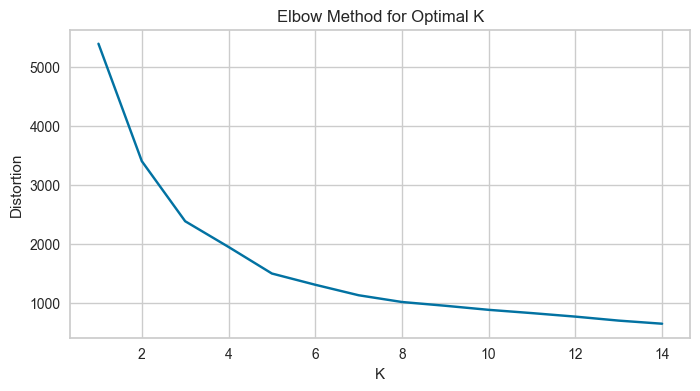

In [111]:

distortions = []
K = range(1, 15)

for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(X_normalized)
    distortions.append(kmeanModel.inertia_)

# Elbow Grafiği
plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal K')
plt.show();



**Linear Regression**

Mean Squared Error: 0.033019908540048604
R^2 Score: 0.8668684623323077


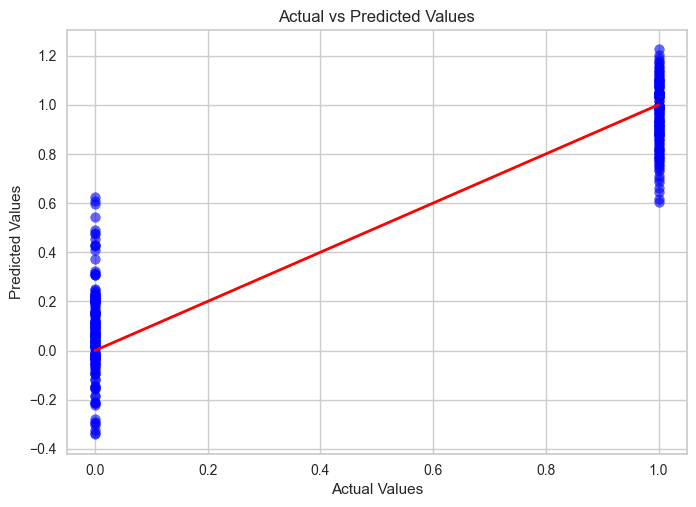

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Split the data into features (X) and target (y)
X = bill[['Variance', 'Skewness', 'Curtosis', 'Entropy']]
y = bill['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values
#plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



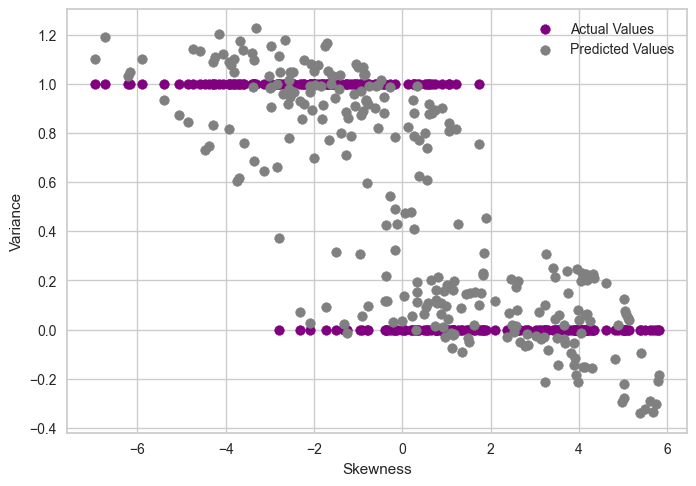

In [115]:
# Plotting
plt.scatter(X_test.iloc[:, 0], y_test, color='purple', label='Actual Values')
plt.scatter(X_test.iloc[:, 0], y_pred, color='gray', label='Predicted Values')
plt.xlabel('Skewness')
plt.ylabel('Variance')
plt.legend()
plt.show()

In [116]:
import statsmodels.api as sm
lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Class   R-squared (uncentered):                   0.327
Model:                            OLS   Adj. R-squared (uncentered):              0.325
Method:                 Least Squares   F-statistic:                              130.5
Date:                Sun, 29 Sep 2024   Prob (F-statistic):                    7.48e-91
Time:                        19:38:47   Log-Likelihood:                         -887.84
No. Observations:                1078   AIC:                                      1784.
Df Residuals:                    1074   BIC:                                      1804.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Variance      -0.0562      0.007     -8.265      0.000      -0.069      -0.043
Skewness      -0.0207      0.005     -4.147      0.000      -0.030      -0.011
Curtosis       0.0237      0.005      4.682      0.000       0.014       0.034
Entropy       -0.1244      0.010    -12.105      0.000      -0.145      -0.104
==============================================================================
Omnibus:                       16.428   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               10.140
Skew:                          -0.055   Prob(JB):                      0.00628
Kurtosis:                       2.538   Cond. No.                         4.93
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [117]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
model.intercept_

0.8134349528378534

In [118]:
model.coef_

array([-0.1435484 , -0.07918081, -0.10370322, -0.00459164])

In [119]:
import numpy as np
X = bill.drop('Variance', axis=1)
y = bill["Variance"]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state=144)
lm = LinearRegression() 
model = lm.fit(X_train, y_train)
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.0398967620419717

In [120]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

1.0398967620419717

Mean Squared Error: 1.308058194697209
R^2 Score: 0.8422692399910919


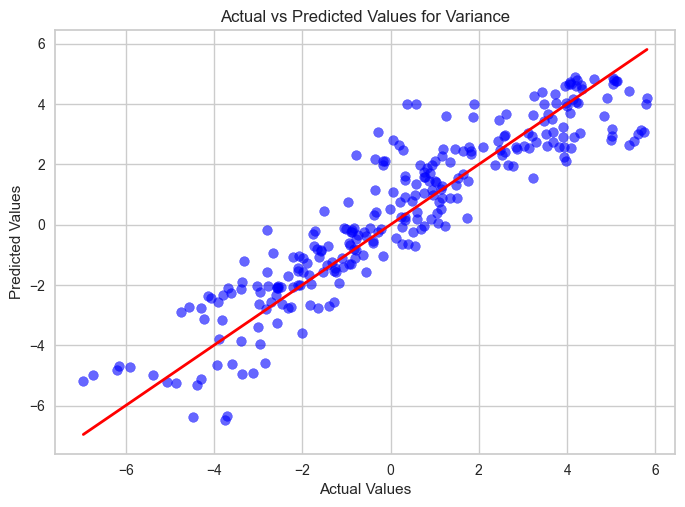

In [121]:
# Define the features (X) and target (y) for predicting Variance
X = bill[['Skewness', 'Curtosis', 'Entropy','Class']]
y = bill['Variance']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Plot the actual vs predicted values for Variance

plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.title('Actual vs Predicted Values for Variance')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



Mean Squared Error: 1.3080581946972087
R^2 Score: 0.8422692399910919


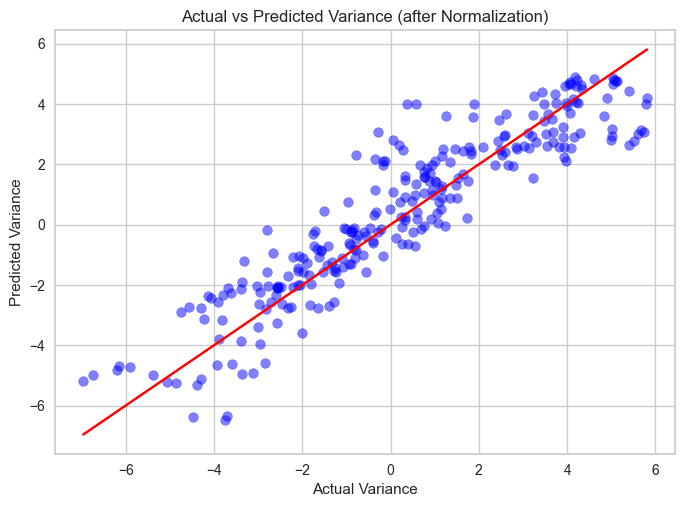

In [122]:


# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate MSE and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Visualize actual vs predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Variance')
plt.ylabel('Predicted Variance')
plt.title('Actual vs Predicted Variance (after Normalization)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
plt.show()


In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, scoring='r2', cv=5)
print(scores.mean(), scores.std())


0.7159812321781995 0.07000469950672543


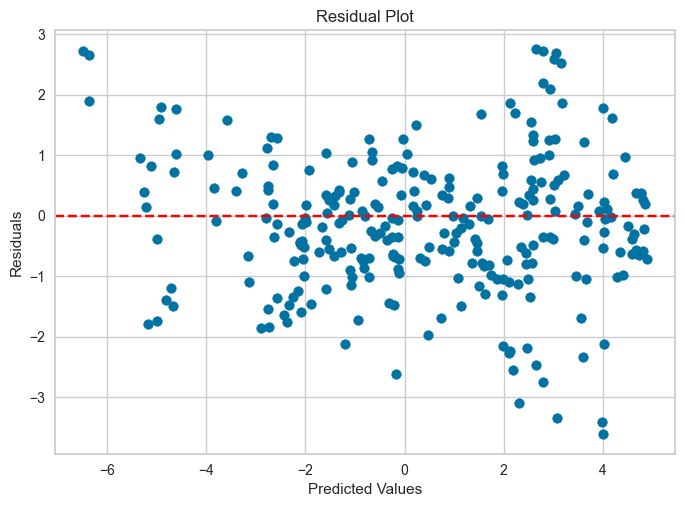

In [124]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
